<a href="https://colab.research.google.com/github/ShaunakSen/Data-Science-and-Machine-Learning/blob/master/Applied_ML_CS_5785.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Applied ML - CS 5785

> GitHub: https://github.com/kuleshov/cornell-cs5785-applied-ml/tree/main/notebooks

> YouTube: https://www.youtube.com/playlist?list=PL2UML_KCiC0UlY7iCQDSiGDMovaupqc83

---




## Lecture 1. Part 2: Three Approaches to Machine Learning


### Supervised Learning Example

In [2]:
# We will load the dataset from the sklearn ML library
from sklearn import datasets
boston = datasets.load_boston()

In [3]:
print (boston.data.shape, boston.target.shape)

(506, 13) (506,)


We will visualize two variables in this dataset: house price and the education level in the neighborhood.



Text(0.5, 1.0, 'House prices as a function of average neighborhood education level')

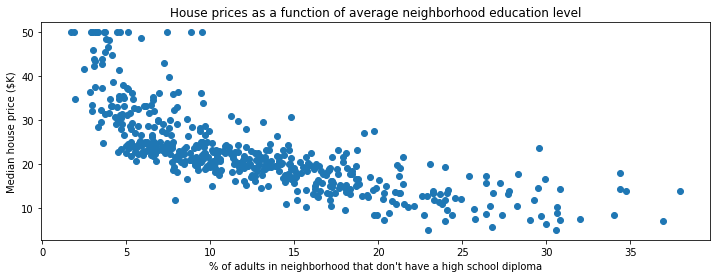

In [4]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 4]
plt.scatter(boston.data[:,12], boston.target)
plt.ylabel("Median house price ($K)")
plt.xlabel("% of adults in neighborhood that don't have a high school diploma")
plt.title("House prices as a function of average neighborhood education level")

We can use this dataset of examples to fit a supervised learning model.



In [5]:
import numpy as np
from sklearn.kernel_ridge import KernelRidge

In [6]:
# Apply a supervised learning algorithm
model = KernelRidge(alpha=1, kernel='poly')
model.fit(boston.data[:,[12]], boston.target.flatten())

KernelRidge(alpha=1, coef0=1, degree=3, gamma=None, kernel='poly',
            kernel_params=None)

Text(0.5, 1.0, 'House prices as a function of average neighborhood education level')

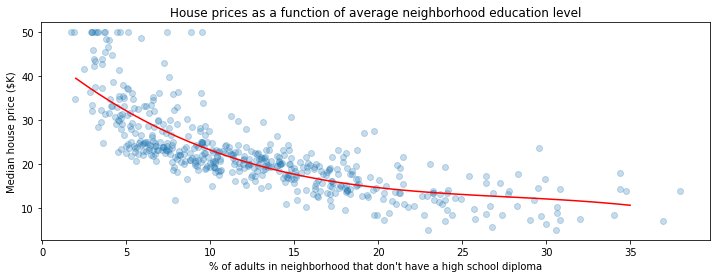

In [7]:
predictions = model.predict(np.linspace(2, 35)[:, np.newaxis])

# Visualize the results
plt.scatter(boston.data[:,[12]], boston.target, alpha=0.25)
plt.plot(np.linspace(2, 35), predictions, c='red')
plt.ylabel("Median house price ($K)")
plt.xlabel("% of adults in neighborhood that don't have a high school diploma")
plt.title("House prices as a function of average neighborhood education level")

### Unsupervised Learning Example

Text(0.5, 1.0, 'Dataset of Iris flowers')

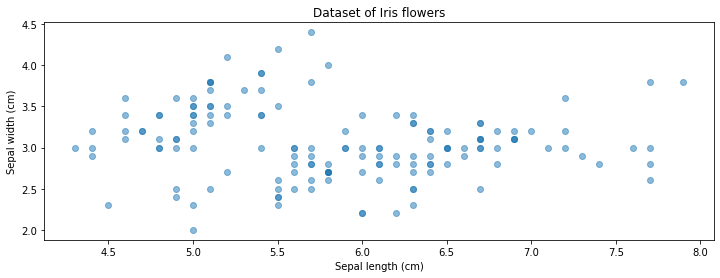

In [8]:
# Load and visualize the Iris flower dataset
iris = datasets.load_iris()
plt.scatter(iris.data[:,0], iris.data[:,1], alpha=0.5)
plt.ylabel("Sepal width (cm)")
plt.xlabel("Sepal length (cm)")
plt.title("Dataset of Iris flowers")

In [9]:
# fit a Gaussian Mixture Model with three components
from sklearn import mixture

### n_componenets basically means we are trying to learn 3 clusters
model = mixture.GaussianMixture(n_components=3, covariance_type='full')
model.fit(iris.data[:,[0,1]])

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

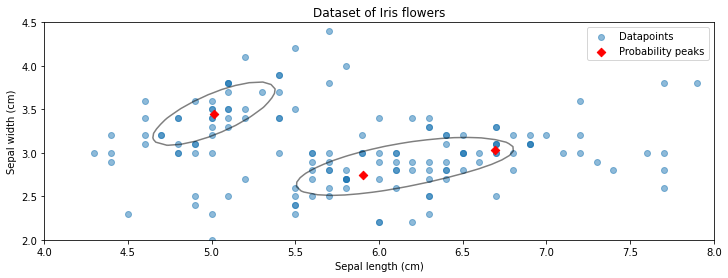

In [10]:
# display learned probabilities as a contour plot
x, y = np.linspace(4.0, 8.0), np.linspace(2.0, 4.5)
X, Y = np.meshgrid(x, y)
Z = -model.score_samples(np.array([X.ravel(), Y.ravel()]).T).reshape(X.shape)
plt.contour(X, Y, Z, levels=np.logspace(0, 10, 1), cmap="gray", alpha=0.5)
plt.scatter(iris.data[:,0], iris.data[:,1], alpha=0.5)
plt.scatter(model.means_[:,0], model.means_[:,1], marker='D', c='r')
plt.ylabel("Sepal width (cm)")
plt.xlabel("Sepal length (cm)")
plt.title("Dataset of Iris flowers")
plt.legend(['Datapoints', 'Probability peaks'])

Here we have kind of identified 3 centroids for the clusters

We can now show the original labels

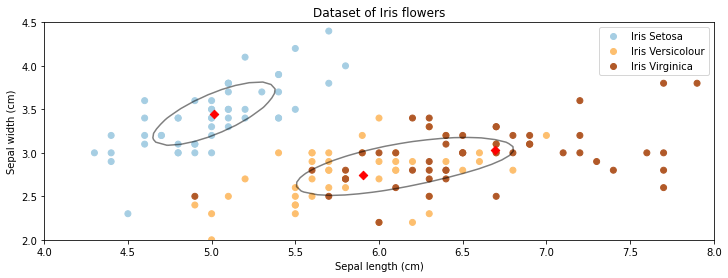

In [11]:
CS = plt.contour(X, Y, Z, levels=np.logspace(0, 30, 1), cmap='gray', alpha=0.5)
p1 = plt.scatter(iris.data[:,0], iris.data[:,1], alpha=1, c=iris.target, cmap='Paired')
plt.scatter(model.means_[:,0], model.means_[:,1], marker='D', c='r')
plt.ylabel("Sepal width (cm)")
plt.xlabel("Sepal length (cm)")
plt.title("Dataset of Iris flowers")
plt.legend(handles=p1.legend_elements()[0], labels=['Iris Setosa', 'Iris Versicolour', 'Iris Virginica'])

As we can see the centroids did roughly corr to teh centers of the 3 classes

## Lecture 2 - Part 1: A Supervised Machine Learning Problem


Let's return to our example: predicting diabates risk. What would a dataset look like?

We will use the UCI Diabetes Dataset; it's a toy dataset that's often used to demonstrate machine learning algorithms.

- For each patient we have a access to a measurement of their body mass index (BMI) and a quantiative diabetes risk score (from 0-400).
- We are interested in understanding how BMI affects an individual's diabetes risk.

In [12]:
import numpy as np
import pandas as pd
from sklearn import datasets


In [13]:
diabetes_data = datasets.load_diabetes()

feature_names = diabetes_data['feature_names']
diabetes_X, diabetes_y = diabetes_data['data'], diabetes_data['target']

print (diabetes_X.shape, diabetes_y.shape)

(442, 10) (442,)


In [14]:
feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [15]:
# Use only the BMI feature
diabetes_X  = diabetes_X[:, 2]

# The BMI is zero-centered and normalized; we recenter it for ease of presentation
diabetes_X = diabetes_X * 30 + 25

In [16]:
diabetes_X_train = diabetes_X[-20:]
diabetes_y_train = diabetes_y[-20:]

In [17]:
pd.DataFrame(data={'bmi': diabetes_X_train, 'target': diabetes_y_train})

,bmi,target
0,27.335902,233.0
1,23.811456,91.0
2,25.331171,111.0
3,23.779122,152.0
4,23.973128,120.0
5,25.169499,67.0
6,27.659245,310.0
7,24.005462,94.0
8,23.294106,183.0
9,24.070131,66.0


Text(0, 0.5, 'Diabetes Risk')

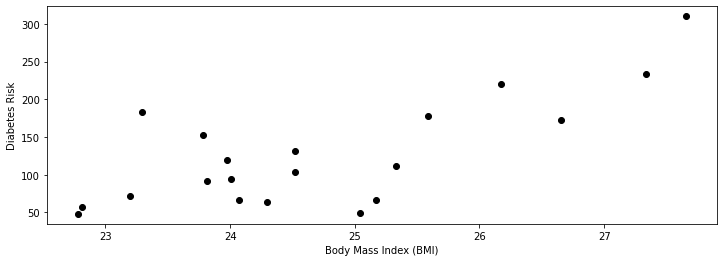

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 4]

plt.scatter(diabetes_X_train, diabetes_y_train,  color='black')
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Diabetes Risk')

### A Supervised Learning Algorithm (Part 1)

What is the relationship between BMI and diabetes risk?

We could assume that risk is a linear function of BMI. In other words, for some unknown $\theta_0, \theta_1 \in \mathbb{R}$, we have
$$ y = \theta_1 \cdot x + \theta_0, $$
where $x$ is the BMI (also called the independent variable), and $y$ is the diabetes risk score (the dependent variable). 

Note that $\theta_1, \theta_0$ are the slope and the intercept of the line relates $x$ to $y$. We call them *parameters*.

We will see many algorithms for this task. For now, let's call the `sklearn.linear_model` library to find a $\theta_1, \theta_0$ that fit the data well.

In [19]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error


# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train.reshape(-1, 1), diabetes_y_train.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
# Make predictions on the training set
diabetes_y_train_pred = regr.predict(diabetes_X_train.reshape(-1, 1))

In [21]:
diabetes_y_train_pred

array([[224.70261326],
       [ 92.9629219 ],
       [149.76810992],
       [ 91.75430088],
       [ 99.00602701],
       [143.72500481],
       [236.78882348],
       [100.21464803],
       [ 73.62498556],
       [102.63189008],
       [199.32157181],
       [ 69.99912249],
       [138.89052073],
       [111.09223723],
       [ 54.28704921],
       [159.4370781 ],
       [119.55258438],
       [119.55258438],
       [181.19225649],
       [ 55.49567023]])

In [22]:
# The coefficients
print('Slope (theta1): \t', regr.coef_[0])
print('Intercept (theta0): \t', regr.intercept_)

Slope (theta1): 	 [37.37884216]
Intercept (theta0): 	 [-797.08173903]


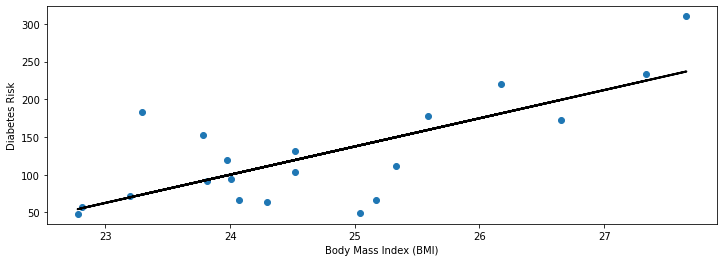

In [23]:
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Diabetes Risk')
plt.scatter(diabetes_X_train, diabetes_y_train)
plt.plot(diabetes_X_train, diabetes_y_train_pred, color='black', linewidth=2)

### Predictions Using Supervised Learning

Given a new dataset of patients with a known BMI, we can use this model to estimate their diabetes risk.


Let's start by loading more data. We will load three new patients (shown in red below) that we haven't seen before.

In [24]:
# Collect 3 data points
diabetes_X_test = diabetes_X[:3]
diabetes_y_test = diabetes_y[:3]

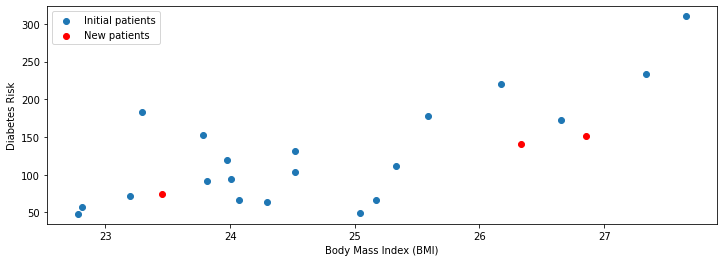

In [25]:
plt.scatter(diabetes_X_train, diabetes_y_train)
plt.scatter(diabetes_X_test, diabetes_y_test,  color='red')
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Diabetes Risk')
plt.legend(['Initial patients', 'New patients'])

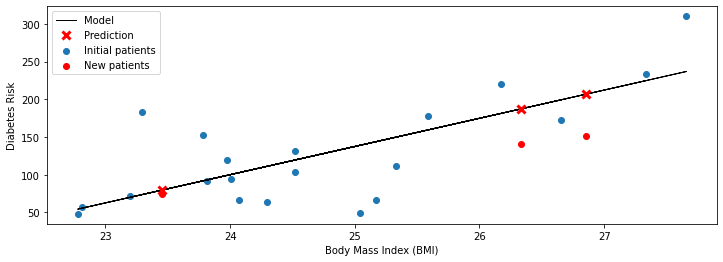

In [26]:
# generate predictions on the new patients
diabetes_y_test_pred = regr.predict(diabetes_X_test.reshape(-1, 1))

# visualize the results
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Diabetes Risk')
plt.scatter(diabetes_X_train, diabetes_y_train)
plt.scatter(diabetes_X_test, diabetes_y_test, color='red', marker='o')
plt.plot(diabetes_X_train, diabetes_y_train_pred, color='black', linewidth=1)
plt.plot(diabetes_X_test, diabetes_y_test_pred, 'x', color='red', mew=3, markersize=8)
plt.legend(['Model', 'Prediction', 'Initial patients', 'New patients'])

## Lecture 2 - Part 2: Anatomy of Supervised Machine Learning: The Dataset

We say that a training dataset of size $n$ (e.g., $n$ patients) is a set
$$\mathcal{D} = \{(x^{(i)}, y^{(i)}) \mid i = 1,2,...,n\}$$

Each $x^{(i)}$ denotes an input (e.g., the measurements for patient $i$), and each $y^{(i)} \in \mathcal{Y}$ is a target (e.g., the diabetes risk). 

Together, $(x^{(i)}, y^{(i)})$ form a *training example*.

In [32]:
import numpy as np
import pandas as pd
from sklearn import datasets

In [33]:
diabetes_data = datasets.load_diabetes()

feature_names = diabetes_data['feature_names']
diabetes_X, diabetes_y = diabetes_data['data'], diabetes_data['target']

print (diabetes_X.shape, diabetes_y.shape)

(442, 10) (442,)


In [34]:
diabetes_X = pd.DataFrame(data=diabetes_X, columns=feature_names)

diabetes_X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


### Training Dataset: Inputs

More precisely, an input $x^{(i)} \in \mathcal{X}$ is a $d$-dimensional vector of the form
$$ x^{(i)} = \begin{bmatrix}
x^{(i)}_1 \\
x^{(i)}_2 \\
\vdots \\
x^{(i)}_d
\end{bmatrix}$$
For example, it could be the measurements the values of the $d$ features for patient $i$.

The set $\mathcal{X}$ is called the feature space. Often, we have, $\mathcal{X} = \mathbb{R}^d$.

Let's look at data for one patient.

In [31]:
diabetes_X.iloc[0]

age    0.038076
sex    0.050680
bmi    0.061696
bp     0.021872
s1    -0.044223
s2    -0.034821
s3    -0.043401
s4    -0.002592
s5     0.019908
s6    -0.017646
Name: 0, dtype: float64

### Training Dataset: Attributes

We refer to the numerical variables describing the patient as *attributes*. Examples of attributes include:
* The age of a patient.
* The patient's gender.
* The patient's BMI.

Note that thes attributes in the above example have been mean-centered at zero and re-scaled to have a variance of one.

### Training Dataset: Features

Often, an input object has many attributes, and we want to use these attributes to define more complex descriptions of the input.

* Is the patient old and a man? (Useful if old men are at risk).
* Is the BMI above the obesity threshold?

We call these custom attributes *features*.

In [35]:
diabetes_X['old_man'] = (diabetes_X['sex'] > 0) & (diabetes_X['age'] > 0.05)
diabetes_X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,old_man
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,False
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,False
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,True
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,False
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,False


### Features vs Attributes

In practice, the terms attribute and features are often used interchangeably. Most authors refer to $x^{(i)}$ as a vector of features (i.e., they've been precomputed). 

We will follow this convention and use attribute only when there is ambiguity between features and attributes.

### Features: Discrete vs. Continuous 

Features can be either discrete or continuous. We will see later that they may be handled differently by ML algorthims.

The BMI feature that we have seen earlier is an example of a continuous feature.

We can visualize its distribution.

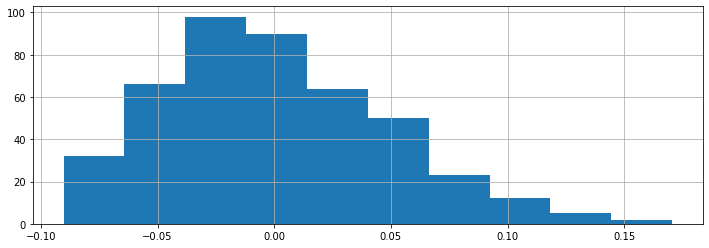

In [37]:
diabetes_X.loc[:, 'bmi'].hist();

Other features take on one of a finite number of discrete values. The `sex` column is an example of a categorical feature.

In this example, the dataset has been pre-processed such that the two values happen to be `0.05068012` and `-0.04464164`.

[ 0.05068012 -0.04464164]


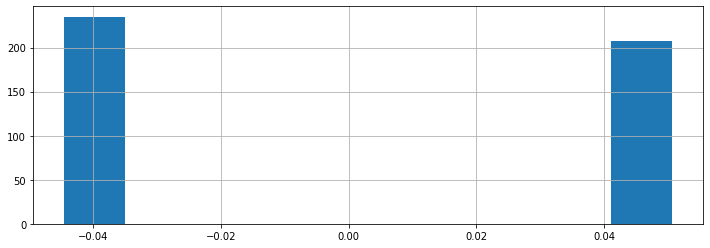

In [38]:
print(diabetes_X.loc[:, 'sex'].unique())
diabetes_X.loc[:, 'sex'].hist();

### Training Dataset: Targets

For each patient, we are interested in predicting a quantity of interest, the *target*. In our example, this is the patient's diabetes risk.

Formally, when $(x^{(i)}, y^{(i)})$ form a *training example*, each $y^{(i)} \in \mathcal{Y}$ is a target. We call $\mathcal{Y}$ the target space.

In [41]:
diabetes_y = pd.DataFrame(data=diabetes_y, columns=['Target'])

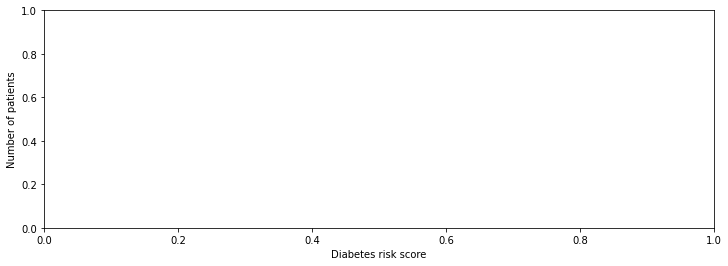

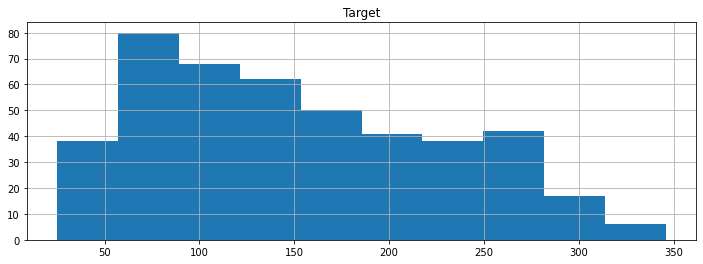

In [43]:
plt.xlabel('Diabetes risk score')
plt.ylabel('Number of patients')
diabetes_y.hist();

### Targets: Regression vs. Classification

We distinguish between two broad types of supervised learning problems that differ in the form of the target variable.

1. __Regression__: The target variable $y$ is continuous. We are fitting a curve in a high-dimensional feature space that approximates the shape of the dataset.
2. __Classification__: The target variable $y$ is discrete. Each discrete value corresponds to a *class* and we are looking for a hyperplane that separates the different classes.

We can easily turn our earlier regression example into classification by discretizing the diabetes risk scores into high or low.

- Remember the train data had only 20 samples : X had one feature: the BMI and y had the target risk score

In [45]:
diabetes_y_train.shape

(20,)

In [46]:
diabetes_y_train

array([233.,  91., 111., 152., 120.,  67., 310.,  94., 183.,  66., 173.,
        72.,  49.,  64.,  48., 178., 104., 132., 220.,  57.])

In [49]:
diabetes_y_train_discr = np.digitize(diabetes_y_train, bins=[150])  ### < 150 -> 0 ; > 150 -> 1
diabetes_y_train_discr

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0])

In [51]:
diabetes_X_train  ### 20 samples of the BMI score

array([27.33590163, 23.81145615, 25.33117117, 23.77912179, 23.97312796,
       25.16949936, 27.65924525, 24.00546232, 23.29410635, 24.07013104,
       26.65688002, 23.19710327, 25.04016191, 24.29647158, 22.77675656,
       25.58984607, 24.52281212, 24.52281212, 26.17186459, 22.80909092])

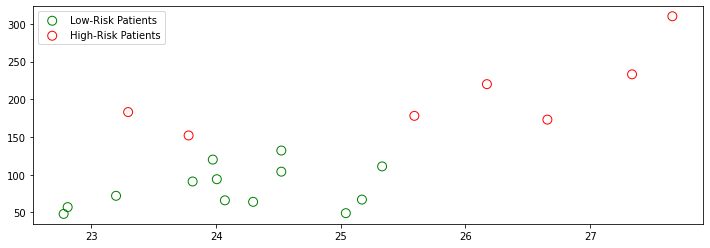

In [52]:
# Visualize it

### X: BMI where the y value is == 0 | Y: y orig where y == 0
plt.scatter(diabetes_X_train[diabetes_y_train_discr==0], diabetes_y_train[diabetes_y_train_discr==0], marker='o', s=80, facecolors='none', edgecolors='g')
### X: BMI where the y value is == 1 | Y: y orig where y == 1
plt.scatter(diabetes_X_train[diabetes_y_train_discr==1], diabetes_y_train[diabetes_y_train_discr==1], marker='o', s=80, facecolors='none', edgecolors='r')
plt.legend(['Low-Risk Patients', 'High-Risk Patients'])

Let's try to generate predictions for this dataset.

In [55]:
# Create logistic regression object (note: this is actually a classification algorithm!)
clf = linear_model.LogisticRegression()

# Train the model using the training sets
clf.fit(diabetes_X_train.reshape(-1,1), diabetes_y_train_discr.reshape(-1,))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [59]:
# Make predictions on the training set
diabetes_y_train_pred = clf.predict(diabetes_X_train.reshape(-1,1))

diabetes_y_train_pred

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0])

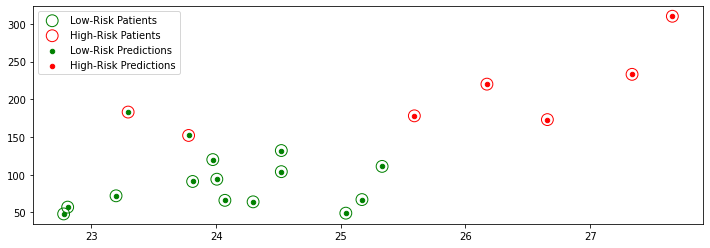

In [60]:
# Visualize it

### X: BMI where original y == 0 | Y: orig y where orig y == 0
plt.scatter(diabetes_X_train[diabetes_y_train_discr==0], diabetes_y_train[diabetes_y_train_discr==0], marker='o', s=140, facecolors='none', edgecolors='g')
### X: BMI where original y == 1 | Y: orig y where orig y == 1
plt.scatter(diabetes_X_train[diabetes_y_train_discr==1], diabetes_y_train[diabetes_y_train_discr==1], marker='o', s=140, facecolors='none', edgecolors='r')
### X: BMI where pred y == 0 | Y: orig y where pred y == 0
plt.scatter(diabetes_X_train[diabetes_y_train_pred==0], diabetes_y_train[diabetes_y_train_pred==0], color='g', s=20)
### X: BMI where pred y == 1 | Y: orig y where pred y == 1
plt.scatter(diabetes_X_train[diabetes_y_train_pred==1], diabetes_y_train[diabetes_y_train_pred==1], color='r', s=20)
plt.legend(['Low-Risk Patients', 'High-Risk Patients', 'Low-Risk Predictions', 'High-Risk Predictions'])    

There are 2 patients where originally they are high risk but our model has predicted that they are low risk